In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

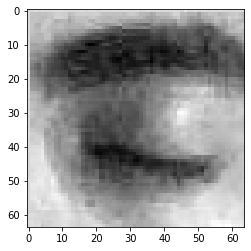

In [2]:
Datadirectory = "dataset/train/"
Classes = ["drowsy","focused"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break    

<function matplotlib.pyplot.show(*args, **kw)>

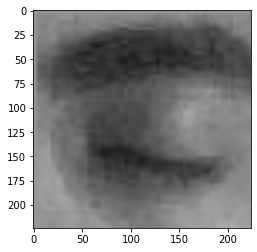

In [3]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show

## Reading all images and converting in =to array for data and labels


In [4]:
training_data = []
img_size = 224
def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0,1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [5]:
create_training_data()

In [6]:
print(len(training_data))

700


In [7]:
import random
random.shuffle(training_data)

In [8]:
x = []
y = []

for features,label in training_data:
    x.append(features)
    y.append(label)

x=np.array(x).reshape(-1, img_size, img_size,3)

In [9]:
x.shape 

(700, 224, 224, 3)

## converted to 3 channels as transfer learning models work on 3 224x224x3 images

In [10]:
## normalizing pixel values to be between 0 and 1

x = x/255.0

In [11]:
y = np.array(y)
## both converted to numpy array for purposes of consistency

In [12]:
import pickle

pickle_out = open("x_custom_new_final.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y_custom_new_final.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## Deep learning model i.e. transfer learning


In [ ]:
## directly start from here

pickle_in = open("x.pickle", "rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model = tf.keras.applications.mobilenet.MobileNet()

In [15]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

# trasfer learning

In [16]:
base_input = model.layers[0].input #input

In [17]:
base_out = model.layers[-4].output # outputof dropout layer

In [18]:
flat_layer = layers.Flatten()(base_out)
final_output = layers.Dense(1)(flat_layer) ## have 1 node at end 
final_output = layers.Activation('sigmoid')(final_output) # output 0 or 1 using sigmoid due to it being binary classification


In [19]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [20]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

## settings for binary classification

In [21]:
new_model.compile(loss="binary_crossentropy", optimizer= "adam", metrics = ["accuracy"])

In [22]:
## training
new_model.fit(x,y, epochs = 10, validation_split = 0.1)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
20/20 [==============================] - ETA: 0s - loss: 0.0784 - accuracy: 0.9524WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000011EB5298288> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach

In [23]:
new_model.save('mymodel_drowsiness_custom_final.h5')

In [16]:
import matplotlib.pyplot as plt
img_size = 224
img_array = cv2.imread("s0034_00102_0_0_0_0_0_02.png", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [17]:
x_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [18]:
x_input.shape

(1, 224, 224, 3)

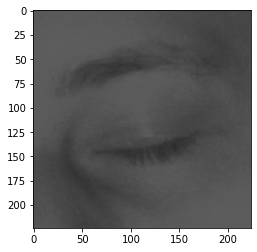

In [19]:
plt.imshow(new_array)

In [20]:
x_input = x_input/255.0

In [21]:
predition = new_model.predict(x_input)

In [22]:
predition


array([[1.1240618e-12]], dtype=float32)

## realtime video

In [1]:
import cv2
from tensorflow import keras
import numpy as np
new_model = keras.models.load_model('mymodel_drowsiness_custom_final.h5')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_lefteye_2splits.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    if len(eyes)!= 0:
        for x,y,w,h in eyes:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)

            eyes1 = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes1) == 0:
                eyes_roi = roi_color

            else:
                for(ex,ey,ew,eh) in eyes1:
                    eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
        
        final_image = cv2.resize(eyes_roi, (224,224))
        final_image = np.expand_dims(final_image, axis = 0) ## adding 4th dimension
        final_image = final_image/255.0

        predictions = new_model.predict(final_image)
        if (predictions> 0.8):
            status = "open eyes"
            cv2.imshow('eyes', eyes_roi)
            print(predictions)
        elif (predictions < 0.01):
            cv2.imshow('eyes', eyes_roi)
            status = "closed eyes"
            print(predictions)

    else:
        status = "no eye detected"
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame, status, (50,50), font , 2, (0,255,0),3, cv2.LINE_8)
    
    cv2.imshow("drowsiiness detection", frame)
    
    if cv2.waitKey(2) &0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWIndows()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[0.88569313]]
[[0.92039937]]
[[0.8739599]]
[[0.00228435]]
[[0.00288463]]
[[0.9779204]]
[[0.8761514]]
[[4.0244874e-10]]
[[0.00614392]]
[[0.96901166]]
[[0.8416767]]
[[0.99850607]]
[[0.9678569]]
[[0.91962945]]
[[0.9998938]]
[[0.9917441]]
[[0.9977285]]
[[0.99253005]]
[[0.00462297]]
[[0.9505381]]
[[0.8068336]]
[[0.97549474]]
[[0.8836785]]
[[0.00065973]]
[[0.00091652]]
[[0.9738445]]
[[0.971

[[6.5201064e-05]]
[[1.4280605e-08]]
[[4.5876227e-06]]
[[1.6883174e-09]]
[[0.00091326]]
[[7.5756516e-06]]
[[8.843469e-05]]
[[3.1563845e-06]]
[[3.1935343e-09]]
[[6.849989e-07]]
[[0.00274396]]
[[1.9805302e-08]]
[[6.177249e-08]]
[[0.84357333]]
[[0.98820347]]
[[0.9738696]]
[[0.97555655]]
[[0.99121255]]
[[0.8729255]]
[[0.98164785]]
[[0.9363264]]
[[0.97476065]]
[[0.98205686]]
[[0.99927646]]
[[0.9049875]]
[[0.9354166]]
[[0.9939587]]
[[0.99529296]]
[[0.9999223]]
[[0.99998]]
[[0.9999387]]
[[0.99991155]]
[[0.9998807]]
[[0.99696094]]
[[0.9988727]]
[[0.99973816]]
[[0.99360883]]
[[0.99387735]]
[[0.99912816]]
[[0.99852055]]
[[0.9971513]]
[[3.8907142e-08]]
[[3.6237236e-06]]
[[0.00372621]]
[[4.9458727e-06]]
[[0.00981957]]
[[0.00935196]]
[[0.851418]]
[[0.865464]]
[[0.8908613]]
[[0.00945078]]
[[0.00194984]]
[[0.00295089]]
[[0.00555036]]
[[0.92694485]]
[[0.86802614]]
[[0.9900393]]
[[0.99790037]]
[[0.98251915]]
[[0.8905883]]
[[0.86716866]]
[[0.9861188]]
[[0.9884567]]
[[0.9888082]]
[[0.9952507]]
[[0.9164126

KeyboardInterrupt: 